# Representing Histograms

Link to markdown cheatsheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

/Users/Ian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
import thinkstats2
hist = thinkstats2.Hist([1,2,2,3,5])
print(hist)

Hist({1: 1, 2: 2, 3: 1, 5: 1})


In [6]:
hist.Freq(2)

2

In [7]:
hist.Freq(4)

0

In [8]:
hist.Values()

[1, 2, 3, 5]

In [9]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [10]:
for val,freq in hist.Items():
    print(val,freq)

1 1
2 2
3 1
5 1


# Plotting Histograms

In [11]:
import thinkplot
%matplotlib inline  

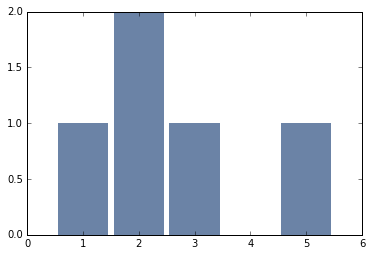

In [12]:
thinkplot.Hist(hist)

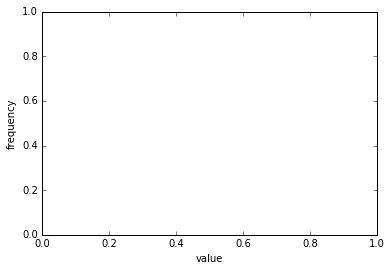

In [13]:
thinkplot.Show(xlabel = 'value', ylabel = 'frequency')

# NSFG Variables

In [14]:
preg = nsfg.ReadFemPreg()

In [15]:
live = preg[preg.outcome == 1]

In [16]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


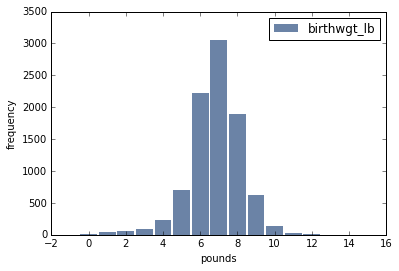

In [17]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds',ylabel='frequency')

This figure is approximately bell-shaped, which is known as a **normal** or **Gaussian** distribution. However, it is asymmetric because it has a **tail** that extends farther to the left than the right.

Here is a histogram of the ounces column (just the remainder value in birth weight).

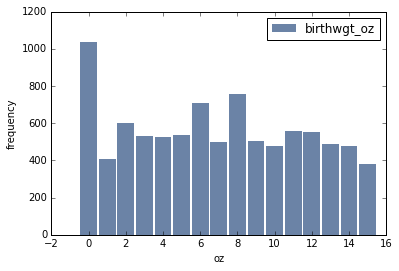

In [18]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='oz',ylabel='frequency')

Notice the non-**uniform** distribution. Downey thinks this is a result of respondents rounding when birth weights are close to an integer value.

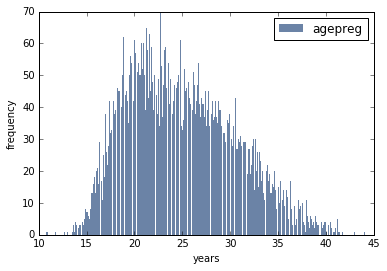

In [19]:
hist = thinkstats2.Hist(live.agepreg, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='years',ylabel='frequency')

Here the **tail** is on the right side. Most mothers are in their 20s, fewer in their 30s

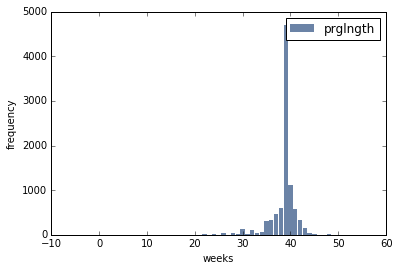

In [20]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='weeks',ylabel='frequency')

By far the most common length of pregnancies is 39 weeks. The left tail is longer than the right; early babies are more common, but pregnancies that last more than 43 weeks are rare (doctors often intervene if they do).

# Outliers 

Should always check for outliers, which are extreme values that might be errors of measurement and recording, or true reports of rare events.

In [21]:
for weeks,freq in hist.Smallest(10):
    print(weeks,freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Values below 10 weeks are certainly errors, most likely a result of outcome not being coded correctly. Domain knowledge or pregancy and the fundamental question of whether or not first babies arrive early or late, suggests that we should only consider full term (>27 weeks) pregnancies.

# First Babies

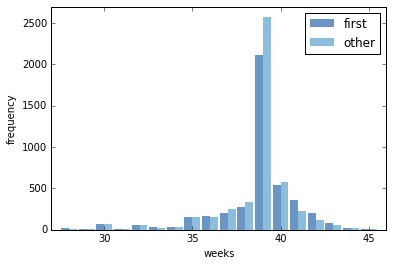

In [22]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align = 'right', width = width, label = 'first')
thinkplot.Hist(other_hist, align = 'left', width = width, label = 'other')
thinkplot.Show(xlabel='weeks', ylabel = 'frequency', axis=[27, 46, 0, 2700])


In [37]:
num_first_pregnancies = len(firsts)
num_other_pregnancies = len(others)
total_pregnancies = num_first_pregnancies + num_other_pregnancies

print(live['caseid'].nunique())

print(num_first_pregnancies,num_other_pregnancies,total_pregnancies)


4413
4413 4735 9148


Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer "first babies" than "others," so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions (PMFs). 

# Summarizing Distributions

*central tendency* 
* Do the values tend to cluster around a particular point?

*modes*
* Is there more than one cluster?

*spread*
* How much variablity is there in the values?

*tails*
* How quickly do the probabilities drop off as we move away from the modes?

*outliers*
* Are there extreme values from from the modes?

Statistics designed to answer these questions are called **summary statistics**. The most common of which is the **mean**, which is meant to describe the **central tendency** of the distribution. 

If you have $n$ values, $x_i$, the mean, $\bar{x}$, is the sum of the values divied by the number of values:
$$\bar{x} = \frac{1}{n} \sum\limits_{i} x_i $$

The word *mean* and *average* are sometimes used interchangeably, but I make this distinction:
* The *mean* of a sample is the summary statistic computed with the previous formula (on pg 22)
* The *average* is one of several summary statistics you might use to describe a central tendency.

# Variance

Variance is a summary statistic intended to describe the variability or **spread** of a distribution. Especially useful to think about when a mean is not appropraite/misleading (as with the cases of the pumpkins cited on page 23).

Mathematically, vairiance is the mean squared deviation. The square root of variance, $S$, is the **standard deviation**. 

$$ S^2 = \frac{1}{n} \sum\limits_{i} (x_i - \bar{x})^2 $$

Pandas data structures provides methods to compute mean, variance, and sandard deviation:


In [23]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print(mean,var,std)

#Units are weeks,"square weeks",and weeks, respectively

38.5605596852 7.30266206783 2.70234381007


Variance is useful in some clculations, but is not a good summary statistics (does not clearly describe central tendency of the distribution).

# Effect size

A **effect size** is a summary statistic to describe the size of an effect. For example, to describe the ddiference between two groups, one obvious choice is the difference in the means.

Mean pregnancy length for first babie sis 38.601; for other babies it is 38.523. The differenec is 0.078 weeks or 13 hours. As a fraction of the typical pregnancy length, this a 0.2% difference.

Another way to convey size of the effect is to compare the difference between groups to the variability within groups.  Cohen's *d* is a statistic intended to do that; it is defined as:


$$d = \frac{\bar{x_2} - \bar{x_2}}{s}$$


In [28]:
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    
    n1,n2 = len(group1),len(group2)
    
    #calculate "standard pooled variance"
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    
    return d
    

The effect size of in terms of cohen's *d* is something like 0.02 standard deviations, which is small

In [29]:
CohenEffectSize(firsts.prglngth,others.prglngth)

0.028879044654449834

# Exercises

*Exercise 2-1.

Based on the results in this capter, suppose you were asked to summarize what you learned about whether first babies arrive late.

Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if wanted to reassure an axious patient?

Finally, imagine that your are Cecil Adams, author of *The Straight Dope* (*https://straightdope.com*), and your job is to anser the question, "Do first babues arrive late?" Write a paragraph that uses the results in this chaper to anser the question clearly, precisely, and honestly.

Well measures of effect size  such as difference in mean pregnancy legnths as well as Cohen's $d$ seem quite small, so if I were trying to comfort an axious patient, I'd probably emphasize that. 

If I were trying to get the attention of the news, I might focus on outliers. For instance, I find it interesting that the ounce part of birth weights, does not follow a uniform distribution, suggesting that doctors may have a tendency to round. I might also extreme birth weights (high or low), lengths of pregnancy, etc.

Regarding part 3:
Based on data taken from a cross-sectional study of pregnancies as conducted by the Center for Disease Control and Prevention (CDC)(i.e., the National Survey of Family Growth (NSFG)) babies from first pregnancies may arrive slightly earlier than babies from other/additional pregancies. Based on information on 9148 pregnancies resulting in live births from 4413 patients, first babies arrived in 38.601 whereas other babies arrived in 38.523. The difference between these two groups is 0.078 weeks, or about 13 hours. The effect size can also be measured by comparing the difference between groups to the variability within groups (Cohen's $d$). By this measure, the difference in means is 0.029 standard deviations. For perspective, the difference in height between men and women is about 1.7 standard deviations. These calculations were based on some manual curation of the data using domain knowledge values to remove data that likely represent errors of measurement and recording were removed. For instance, only full term (>27 weeks) pregnancies were considered in these calculations.